In [1]:
import pysilcam.postprocess as scpp
import pysilcam.plotting as scplt
from pysilcam.config import load_config, PySilcamSettings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('ticks')

In [4]:
config_file = 'config_example.ini'
stats_csv_file = 'STN07-STATS.csv'

conf = load_config(config_file)
settings = PySilcamSettings(conf)

PostProcess(path_length=11, window_size=5, pix_size=14.379084967320262)

In [2]:
stats = pd.read_csv(stats_csv_file)

nims = scpp.count_images_in_stats(stats)
print(len(stats),'particles in',nims,'images')

49112 particles in 1374 images


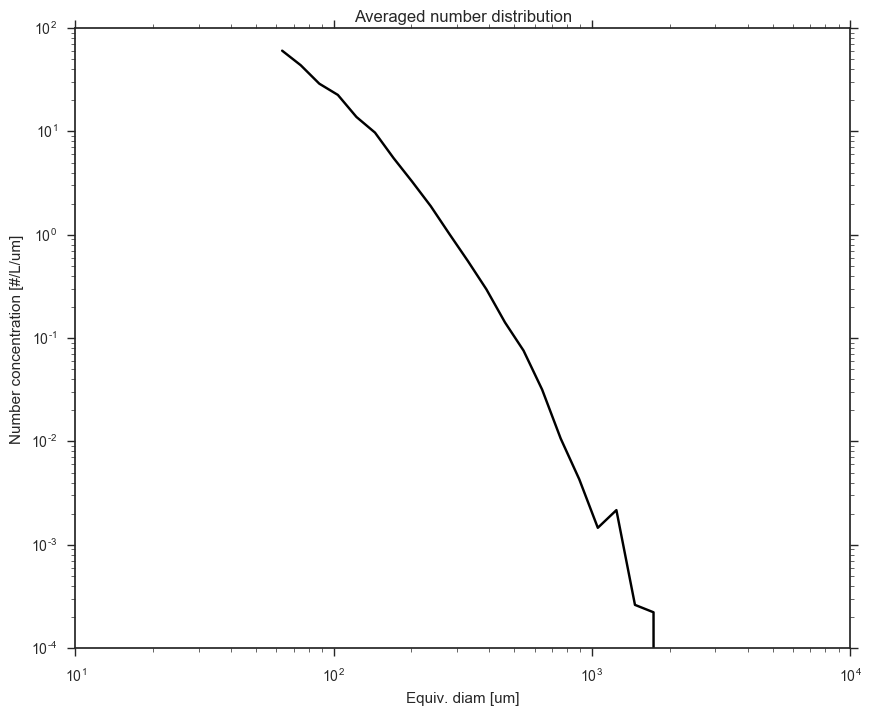

In [3]:
f, a = plt.subplots(1,1,figsize=(10,8))
scplt.nd_scaled(stats,settings.PostProcess, a)
a.set_title('Averaged number distribution')

In [52]:
dias, bm = scpp.get_size_bins()
nd = np.zeros((nims,len(dias)),dtype=np.float64)
for i, u in enumerate(stats['timestamp'].unique()):
    substats = stats[stats['timestamp']==u]
    dias, nd[i,:] = scpp.nd_from_stats_scaled(substats, settings.PostProcess)

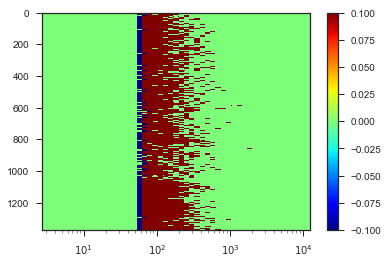

In [74]:
nd_ = np.copy(nd)
# nd_[np.isnan(nd_)] = 0

f = plt.figure()
pcm = plt.pcolormesh(dias,np.arange(0,nims),nd_, cmap='jet')
f.colorbar(pcm, ax=plt.gca())
plt.xscale('log')
plt.gca().invert_yaxis()